In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df21=pd.read_csv(r'/content/국토교통부_연도별전세계항공사고발생현황_20211231.csv',encoding='cp949')
df22=pd.read_csv(r'/content/국토교통부_연도별전세계항공사고발생현황_20221231.csv',encoding='cp949')
df23=pd.read_csv(r'/content/국토교통부_연도별전세계항공사고발생현황_20231231.csv',encoding='cp949')

In [ ]:
t_df=pd.concat([df21,df22,df23],ignore_index=True)
t_df

,순번,일자,항공사,기종,비행단계,탑승,사망,사고 개요
0,1,2021-01-02,Brasil Vida Taxi Aereo,Learjet 31A,LDG,4.0,0.0,Brasil Vida Taxi Aereo 소속 Learjet 31A 항공기가 브라질...
1,2,2021-01-09,SX Transport LLC,Cessna 560 Citation V,ENR,0.0,0.0,SX Transport LLC 소속 Cessna 560 Citation V 항공기가...
2,3,2021-01-09,Sriwijaya Air,Boeing 737-524 (WL),ENR,62.0,62.0,Sriwijaya Air 소속 Boeing 737-524 항공기가 자카르타 Jaka...
3,4,2021-01-12,Kenya Air Force - KAF,Harbin Y-12-II,UNK,4.0,4.0,Kenya Air Force KAF 소속 Harbin Y-12-II 항공기가 케냐...
4,5,2021-01-19,West Atlantic (UK),Boeing 737-4Q8 (SF),LDG,2.0,0.0,West Atlantic 소속 Boeing 737-4Q8 화물기가 영국 Exeter...
...,...,...,...,...,...,...,...,...
414,116,2023-12-17,Government of Kenya,Cessna 208B Grand Caravan,ICL,10.0,NaN,Government of Kenya 소속 Cessna 208B Grand Carav...
415,117,2023-12-19,Southwest Airlines,Boeing 737-8H4 (WL),UNK,107.0,NaN,Southwest Airlines 소속 Boeing 737-8H4 (WL) 항공기가...
416,118,2023-12-27,de Havilland Canada DHC-6 Twin Otter 300,Air Tindi,APR,10.0,NaN,Air Tindi 소속 de Havilland Canada DHC-6 Twin Ot...
417,119,2023-12-30,Kalyon Guven Aviation,Cessna 560XL Citation XLS,LDG,4.0,NaN,Kalyon Guven Aviation 소속 Cessna 560XL Citation...


In [ ]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      419 non-null    int64  
 1   일자      419 non-null    object 
 2   항공사     419 non-null    object 
 3   기종      419 non-null    object 
 4   비행단계    419 non-null    object 
 5   탑승      375 non-null    float64
 6   사망      317 non-null    float64
 7   사고 개요   419 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.3+ KB


In [ ]:
data=t_df[['비행단계','탑승','사망']]
data

,비행단계,탑승,사망
0,LDG,4.0,0.0
1,ENR,0.0,0.0
2,ENR,62.0,62.0
3,UNK,4.0,4.0
4,LDG,2.0,0.0
...,...,...,...
414,ICL,10.0,NaN
415,UNK,107.0,NaN
416,APR,10.0,NaN
417,LDG,4.0,NaN


In [ ]:
data.isna().sum()

비행단계      0
탑승       44
사망      102
dtype: int64

실제 데이터를 확인했을 때
- 탑승자가 없는 경우
  - 탑승자를 확인할 수 없음

    (항공사를 파악할 수 없거나
     전쟁 중인 러시아 항공기인 경우,
     개인 소유 항공기 등)
  -탑승 전 기체 결함
- 사망자가 없는 경우
  - 인명피해 없음
  - 탑승자, 사망자를 파악할 수 없는 경우

=> 0으로 표시되어 있거나 비어있는 데이터는 모두 삭제하였음

In [ ]:
data[['탑승','사망']].replace(0,np.nan,inplace=True)

<ipython-input-8-58fbe3cfa921>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['탑승','사망']].replace(0,np.nan,inplace=True)


In [ ]:
data.isna().sum()

비행단계      0
탑승       44
사망      102
dtype: int64

In [ ]:
data2=data.dropna().copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   비행단계    294 non-null    object 
 1   탑승      294 non-null    float64
 2   사망      294 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.2+ KB


In [ ]:
data2['비행단계'].value_counts()

비행단계
LDG    118
ENR     42
APR     41
TOF     34
STD     18
ICL     16
TXI      9
UNK      7
MNV      5
PBT      3
ENG      1
Name: count, dtype: int64

비행단계:
- STD: 정지(항공기 운항 전·후 항공기가 움직이지 않고 정지해 있는 단계)
- PBT: 견인(항공기가 견인차의 도움을 받아 움직이는 단계)
- TXI: 유도로 이동(항공기가 이륙 전·후 자체 동력으로 비행장 내를 이동하는 단계)
- TOF: 이륙(이륙을 위한 발동기 출력상승 시점부터 로테이션을 거쳐 35 feet 도달까지의 단계)   
- ICL: 초기 상승(이륙 마무리 단계부터 최초 출력감소 또는 1천feet 도달까지의 단계)
- ENR: 순항(초기 상승을 완료한 시점부터 비행 후 착륙하고자 하는 공항의 첫 접근지점에 진입하는 도달하는 시점까지의 단계)
- APR: 접근(첫 접근지점부터 활주로에 착지하기 위해 착륙을 시작하는 순간까지의 단계)    
- LDG: 착륙(착륙 시작부터 활주로 개방 시점 또는 활주로 접지단계까지 단계)   
- MNV: 기동(곡예비행, 저고도 비행)
- ENG: 비행 훈련
- UNK: 불분명(unknown)     


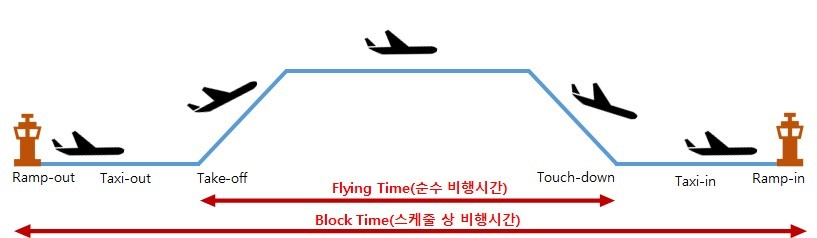

In [ ]:
stage=['STD','PBT','TXI','TOF','ICL','ENR','APR','LDG','MNV','ENG','UNK']

data2['비행단계_코드']=data2['비행단계'].replace(stage,range(len(stage)))
data2

,비행단계,탑승,사망,비행단계_코드
0,LDG,4.0,0.0,7
1,ENR,0.0,0.0,5
2,ENR,62.0,62.0,5
3,UNK,4.0,4.0,10
4,LDG,2.0,0.0,7
...,...,...,...,...
392,ENR,20.0,8.0,5
393,ENR,1.0,1.0,5
394,TOF,2.0,2.0,3
400,ICL,12.0,12.0,4


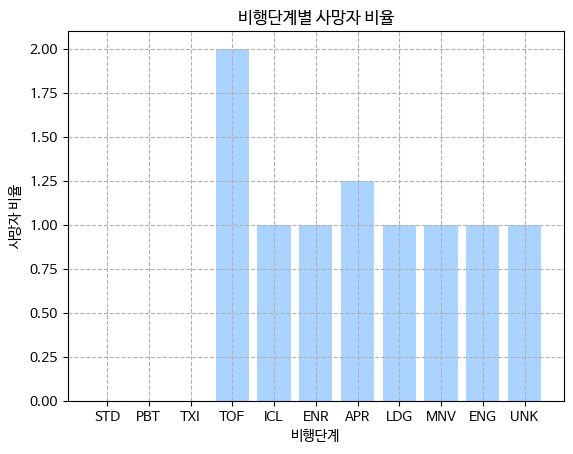

In [ ]:
plt.bar(data2['비행단계_코드'],data2['사망']/data2['탑승'],color='#AAD3FF')
plt.xticks(range(len(stage)),stage)
plt.rc('font', family='NanumBarunGothic')
plt.title('비행단계별 사망자 비율')
plt.xlabel('비행단계')
plt.ylabel('사망자 비율')
plt.grid(True,linestyle='--')
plt.show()

In [ ]:
data2['사망자 비율']=data2['사망']/data2['탑승']
data2

,비행단계,탑승,사망,비행단계_코드,사망자 비율
0,LDG,4.0,0.0,7,0.0
1,ENR,0.0,0.0,5,NaN
2,ENR,62.0,62.0,5,1.0
3,UNK,4.0,4.0,10,1.0
4,LDG,2.0,0.0,7,0.0
...,...,...,...,...,...
392,ENR,20.0,8.0,5,0.4
393,ENR,1.0,1.0,5,1.0
394,TOF,2.0,2.0,3,1.0
400,ICL,12.0,12.0,4,1.0


In [ ]:
data2.isna().sum()

비행단계        0
탑승          0
사망          0
비행단계_코드     0
사망자 비율     23
dtype: int64

In [ ]:
data2['사망자 비율'].replace(np.nan,0,inplace=True)

In [ ]:
data2['사망자 비율'].value_counts()

사망자 비율
0.000000    204
1.000000     62
0.500000      3
0.666667      2
0.333333      2
0.250000      2
0.200000      1
1.250000      1
0.900000      1
2.000000      1
0.166667      1
0.018519      1
0.441860      1
0.142857      1
0.058824      1
0.125000      1
0.025316      1
0.555556      1
0.357143      1
0.800000      1
0.727273      1
0.520833      1
0.263158      1
0.750000      1
0.400000      1
Name: count, dtype: int64

In [ ]:
data2[data2['사망자 비율']>1]

,비행단계,탑승,사망,비행단계_코드,사망자 비율
357,TOF,3.0,6.0,3,2.00
370,APR,8.0,10.0,6,1.25


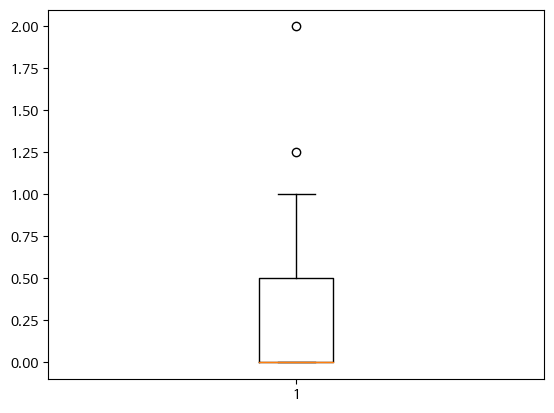

In [ ]:
plt.boxplot(data2['사망자 비율'],whis=1.0)
plt.show()

Skydive Warsaw 소속 Cessna 208B Grand Caravan 항공기가 폴란드 Chrcynno 비행장에서 터치 앤 고 훈련비행 중 격납고에 추락하여 탑승자 3명 중 1명과 지상에 있던 5명이 사망함.

Jetvalet Sdn Bhd 소속 Raytheon 390 Premier I 항공기가 말레이시아 Sultan Abdul Aziz Shah 공항에 접근 중 제어를 상실하고 인근 고속도로에 충돌하여 탑승자 전원 및 지상의 자동차와 오토바이 운전자 2명이 사망함.

=> 두 이상치는 사망자 수에 지상 사망자 수까지 포함되어있어 탑승자 수보다 사망자 수가 더 많게 나옴

In [ ]:
data3=data2.drop(data2[data2['사망자 비율']>1].index)
data3['사망자 비율'].value_counts()

사망자 비율
0.000000    204
1.000000     62
0.500000      3
0.666667      2
0.333333      2
0.250000      2
0.025316      1
0.900000      1
0.166667      1
0.018519      1
0.441860      1
0.142857      1
0.058824      1
0.200000      1
0.357143      1
0.555556      1
0.125000      1
0.800000      1
0.727273      1
0.520833      1
0.263158      1
0.750000      1
0.400000      1
Name: count, dtype: int64

In [ ]:
data3.corr(numeric_only=True)

,탑승,사망,비행단계_코드,사망자 비율
탑승,1.000000,0.248606,0.017536,-0.079088
사망,0.248606,1.000000,0.014060,0.398176
비행단계_코드,0.017536,0.014060,1.000000,0.033505
사망자 비율,-0.079088,0.398176,0.033505,1.000000


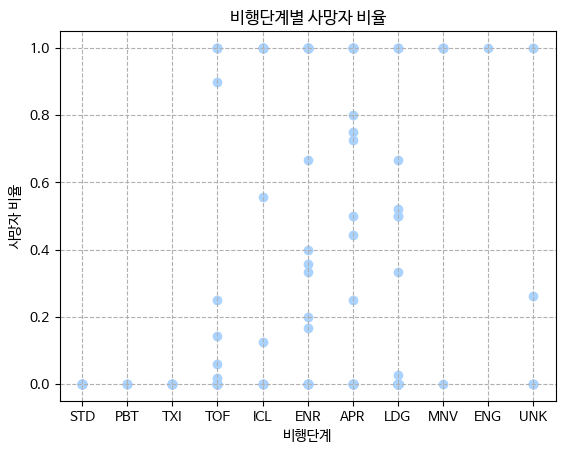

In [ ]:
plt.scatter(data3['비행단계_코드'],data3['사망자 비율'],c='#AAD3FF')
plt.xticks(range(len(stage)),stage)
plt.rc('font', family='NanumBarunGothic')
plt.title('비행단계별 사망자 비율')
plt.xlabel('비행단계')
plt.ylabel('사망자 비율')
plt.grid(True,linestyle='--')
plt.show()

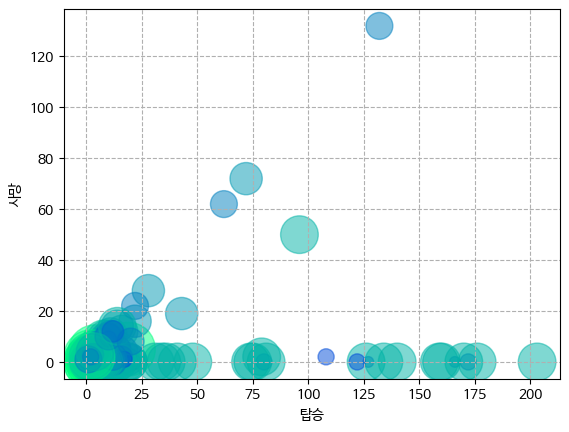

In [ ]:
plt.scatter(data3['탑승'],data3['사망'],s=data3['비행단계_코드']**2*15,c=data3['비행단계_코드'],alpha=0.5),c='cool'
plt.rc('font', family='NanumBarunGothic')
plt.xlabel('탑승')
plt.ylabel('사망')
plt.grid(True,linestyle='--')
plt.show()

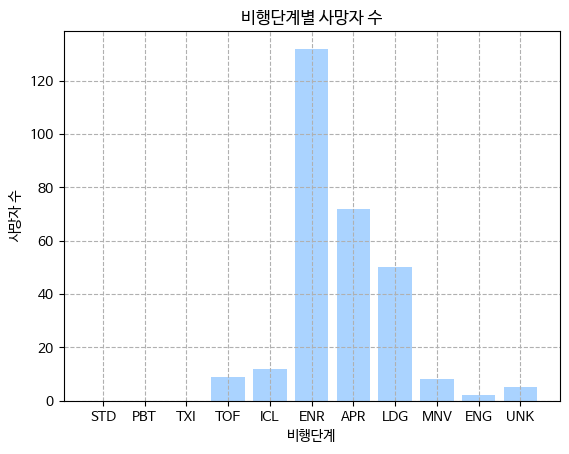

In [ ]:
plt.bar(data3['비행단계_코드'],data3['사망'],color='#AAD3FF')
plt.xticks(range(len(stage)),stage)
plt.rc('font', family='NanumBarunGothic')
plt.title('비행단계별 사망자 수')
plt.xlabel('비행단계')
plt.ylabel('사망자 수')
plt.grid(True,linestyle='--')
plt.show()

In [ ]:
data2['비행단계'].value_counts()

비행단계
LDG    118
ENR     42
APR     41
TOF     34
STD     18
ICL     16
TXI      9
UNK      7
MNV      5
PBT      3
ENG      1
Name: count, dtype: int64

In [ ]:
data4=data3[['비행단계','탑승','사망']].groupby('비행단계').sum().sort_values(by='탑승',ascending=False)
data4.reset_index(inplace=True)
data4

,비행단계,탑승,사망
0,LDG,2347.0,86.0
1,TOF,654.0,26.0
2,ENR,435.0,326.0
3,APR,323.0,235.0
4,TXI,309.0,0.0
5,STD,144.0,0.0
6,ICL,109.0,61.0
7,UNK,35.0,11.0
8,MNV,18.0,16.0
9,PBT,5.0,0.0


항공사고의 특성상 빈번하게 일어나는 사건이 아니며,

사고가 일어나면 탑승자 수와 사망자 수가 일치하는 경우가 많아

비행단계와 사망자 수는 큰 상관관계가 없었다.

그래서 비행단계별 사망자 수가 가장 많은 경우를 확인해봤더니

ENR(순항)단계에서는 탑승자 수에 비해 사망자 수가 가장 많았고,

가장 사고가 많이 일어난 LDG(착륙)단계에서는 탑승자 수에 비해 사망자 수가 비교적 많지 않다는 것을 확인할 수 있었다.

